### The Dataset ###
**Age** : The age of the patient. (Numeric)

**Sex** :	The gender of the patient. (Categorical)

**Chest pain type** :	The type of chest pain experienced by the patient. (Categorical)

**BP** : The blood pressure level of the patient. (Numeric)

**Cholesterol**	: The cholesterol level of the patient. (Numeric)

**FBS over 120** : The fasting blood sugar test results over 120 mg/dl. (Numeric)

**EKG results** :	The electrocardiogram results of the patient. (Categorical)

**Max HR** : The maximum heart rate levels achieved during exercise testing. (Numeric)

**Exercise angina** :	The angina experienced during exercise testing. (Categorical)

**ST depression** : The ST depression on an Electrocardiogram. (Numeric)

**Slope of ST** :	The slope of ST segment electrocardiogram readings. (Categorical)

**Number of vessels fluro** :	The amount vessels seen in Fluoroscopy images. (Numeric)

**Thallium** :	The Thallium Stress test findings. (Categorical)

**Heart Disease** : Whether or not the patient has been diagnosed with Heart Disease. (Categorical)

In [1]:
# importing data
import pandas as pd
import numpy as np

df = pd.read_csv('Heart_Disease_Prediction.csv', index_col='index')
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
index,,,,,,,,,,,,,,
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


<AxesSubplot:xlabel='Age', ylabel='Count'>

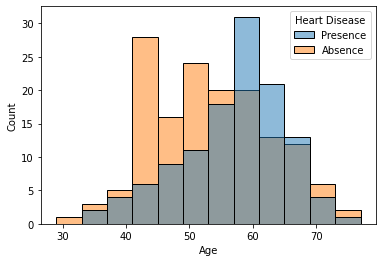

In [2]:
# visualize 
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df, x='Age', hue='Heart Disease') # not distributed normally

Steps of preprocessing :
- change heart disease column to 0 and 1 values using map() function
- normalize numerical column because of uneven distribution
- one hot encode all the categorical values

In [2]:
# setup feature variables
all_features = df.drop('Heart Disease', axis=1).columns
CATEGORICAL = ['Sex', 'Chest pain type', 'EKG results', 'Exercise angina', 'Slope of ST', 'Thallium']
NUMERICAL = np.setdiff1d(all_features, CATEGORICAL)
TARGET = 'Heart Disease'

In [3]:
# map target variable
heart_disease = {'Absence' : 0, 'Presence' : 1}
df[TARGET] = df[TARGET].map(heart_disease)
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
index,,,,,,,,,,,,,,
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [11]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [14]:
class Scaler(BaseEstimator, TransformerMixin) :
    def __init__(self, features) :
        self.features = features
    def fit(self, X, y=None) :
        self.scaler = MinMaxScaler()
        return self
    def transform(self, X) :
        X_transformed = X.copy()
        X_transformed[self.features] = pd.DataFrame(self.scaler.fit_transform(X[self.features]), columns = self.features)
        return X_transformed
        
class Encoder(BaseEstimator, TransformerMixin) :
    def __init__(self, features, drop='if_binary') :
        self.features = features
        self.drop = drop
    def fit(self, X, y=None) :
        self.encoder = OneHotEncoder(drop=self.drop)
        # self.encoder.fit(X[self.features])
        return self
    def transform(self, X) :
        non_encoded = X.drop(self.features, axis=1)
        X_transformed = pd.concat([non_encoded, pd.DataFrame(self.encoder.fit_transform(X[self.features]).toarray(), columns=self.encoder.get_feature_names(self.features))], axis=1)
        return X_transformed

pipe = Pipeline([
    ('Normalizer', Scaler(NUMERICAL)),
    ('OneHotEncoder', Encoder(CATEGORICAL))
])

df2 = pipe.fit_transform(df)

In [15]:
df2

,Age,BP,Cholesterol,FBS over 120,Max HR,ST depression,Number of vessels fluro,Heart Disease,Sex_1,Chest pain type_1,...,EKG results_0,EKG results_1,EKG results_2,Exercise angina_1,Slope of ST_1,Slope of ST_2,Slope of ST_3,Thallium_3,Thallium_6,Thallium_7
0,0.854167,0.339623,0.447489,0.0,0.290076,0.387097,1.000000,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.791667,0.198113,1.000000,0.0,0.679389,0.258065,0.000000,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.583333,0.283019,0.308219,0.0,0.534351,0.048387,0.000000,1,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.729167,0.320755,0.312785,0.0,0.259542,0.032258,0.333333,0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.937500,0.245283,0.326484,0.0,0.381679,0.032258,0.333333,0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.479167,0.735849,0.166667,1.0,0.694656,0.080645,0.000000,0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
266,0.312500,0.245283,0.312785,0.0,0.778626,0.000000,0.000000,0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
267,0.562500,0.433962,0.383562,0.0,0.625954,0.209677,0.000000,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
268,0.583333,0.433962,0.150685,0.0,0.587786,0.064516,0.000000,0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [16]:
from sklearn.model_selection import train_test_split

X = df2.drop(TARGET, axis=1)
y = df2[TARGET]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [17]:
from sklearn.linear_model import LogisticRegression

estimator = LogisticRegression()
estimator.fit(X_train, y_train)

LogisticRegression()

In [18]:
from sklearn.metrics import mean_squared_error

pred = estimator.predict(X_test)
result = mean_squared_error(y_test, pred)
print(f'MSE : {result}')

MSE : 0.14814814814814814
